In [1]:
# Libraries 
import time
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ranksums
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from matplotlib import pyplot as plt

# Set the path to the BIFXML file
# path = 'testing/lecture_example.BIFXML'
path = 'testing/dog_problem.BIFXML'

# Load the network
net = BayesNet()
bn = BNReasoner(net)
net.load_from_bifxml(path)

/Users/gast/Documents/Master Artificial Intelligence/VU/Jaar 1/Knowledge Representation/Assignments/KR21_project2-main/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


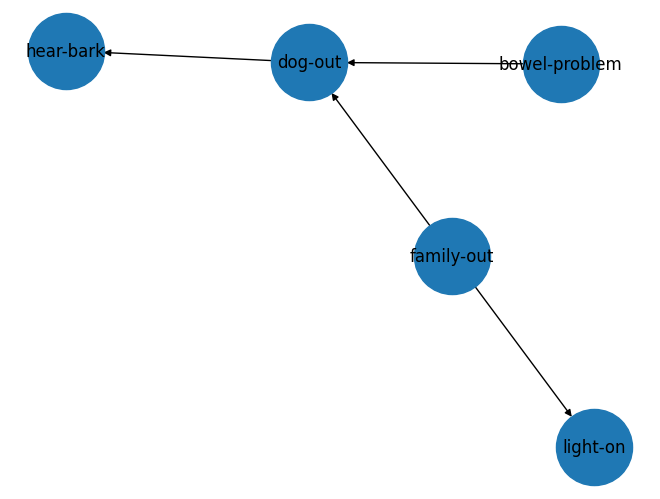

In [2]:
# Get the nodes in the network
net.get_all_variables()

# Draw the network
net.draw_structure()

In [3]:
# Min_degree
mindegree_pruned = bn.md_MAP_MPE(['light-on'], {'hear-bark': True}, "marginal", "mindegree")
mindegree_NOTpruned = bn.md_MAP_MPE(['light-on'], {'hear-bark': True}, "marginal", "mindegree", False)

# Min_fill
minfill_pruned = bn.md_MAP_MPE(['light-on'], {'hear-bark': True}, "marginal", "minfill")
minfill_NOTpruned = bn.md_MAP_MPE(['light-on'], {'hear-bark': True}, "marginal", "minfill", False)

In [4]:
def heuristic_test(query, evidence, method, heuristic, pruned = True):
    times = []
    for i in range(100):
        start = time.process_time()
        solution = bn.md_MAP_MPE(query, evidence, method, heuristic, pruned)
        end = time.process_time()
        times.append(end-start)
    return times

mind_pruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "mindegree")
minf_pruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "minfill")

mind_NOTpruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "mindegree", False)
minf_NOTpruned = heuristic_test(['light-on'], {'hear-bark': True}, "marginal", "minfill", False)

In [5]:
d_seperation = bn.d_separation(['family-out'], ['hear-bark'], ['dog-out'])
if d_seperation:
    print("No path is found between X and Y given Z, meaning that X and Y are d-seperated.")
else:
    print("A path is found between X and Y given Z, meaning that X and Y are NOT d-seperated and therefore we are not sure if they are independent of each other")

A path is found between X and Y given Z, meaning that X and Y are NOT d-seperated and therefore we are not sure if they are independent of each other


In [6]:
#### COMPARISON Mindegree vs. Minfill Pruned vs not pruned ####

# Put the results into a dataframe
mf_pruned = pd.DataFrame(minf_pruned, columns = ['time'])
md_pruned = pd.DataFrame(mind_pruned, columns = ['time'])
mf_NOTpruned = pd.DataFrame(minf_NOTpruned, columns = ['time'])
md_NOTpruned = pd.DataFrame(mind_NOTpruned, columns = ['time'])

# Shapiro wilk test (significant p-value = not normally distributed)
stats.shapiro(mf_pruned['time'])      # ShapiroResult(statistic=0.8017258644104004, pvalue=2.7982843819884806e-10)
stats.shapiro(md_pruned['time'])       # ShapiroResult(statistic=0.5642133951187134, pvalue=9.449404268362408e-16)
stats.shapiro(mf_NOTpruned['time'])      # ShapiroResult(statistic=0.8017258644104004, pvalue=2.7982843819884806e-10)
stats.shapiro(md_NOTpruned['time'])       # ShapiroResult(statistic=0.5642133951187134, pvalue=9.449404268362408e-16)

# Print the results
print("Are the results of the pruned minfill heuristic normally distributed: ", stats.shapiro(mf_pruned['time'])[1] > 0.05)
print("Are the results of the pruned mindegree heuristic normally distributed: ", stats.shapiro(md_pruned['time'])[1] > 0.05)
print("Are the results of the unpruned minfill heuristic normally distributed: ", stats.shapiro(mf_NOTpruned['time'])[1] > 0.05)
print("Are the results of the unpruned mindegree heuristic normally distributed: ", stats.shapiro(md_NOTpruned['time'])[1] > 0.05)

Are the results of the pruned minfill heuristic normally distributed:  False
Are the results of the pruned mindegree heuristic normally distributed:  False
Are the results of the unpruned minfill heuristic normally distributed:  False
Are the results of the unpruned mindegree heuristic normally distributed:  False


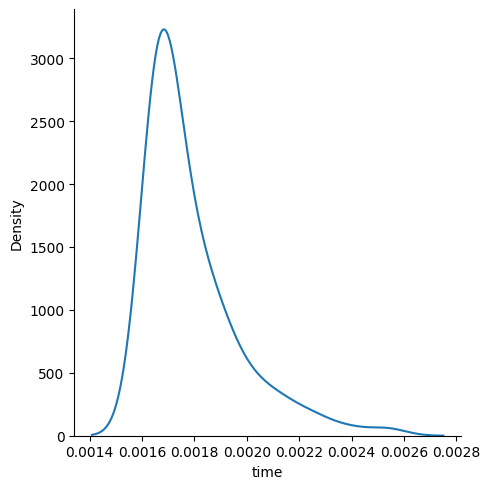

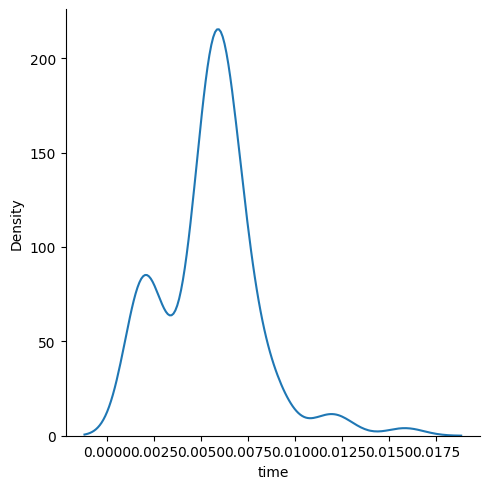

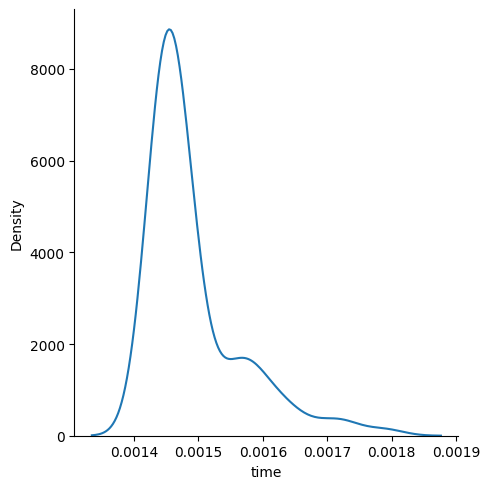

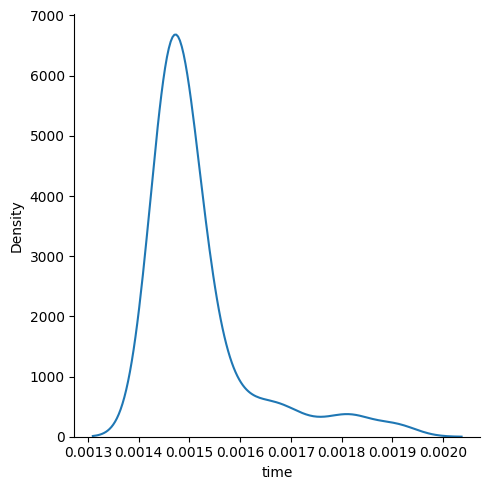

In [7]:
# Density plots --> To check if the data is normally distributed
sns.displot(mf_pruned, x = "time", kind="kde")
sns.displot(md_pruned, x = "time", kind="kde")
sns.displot(mf_NOTpruned, x = "time", kind="kde")
sns.displot(md_NOTpruned, x = "time", kind="kde")

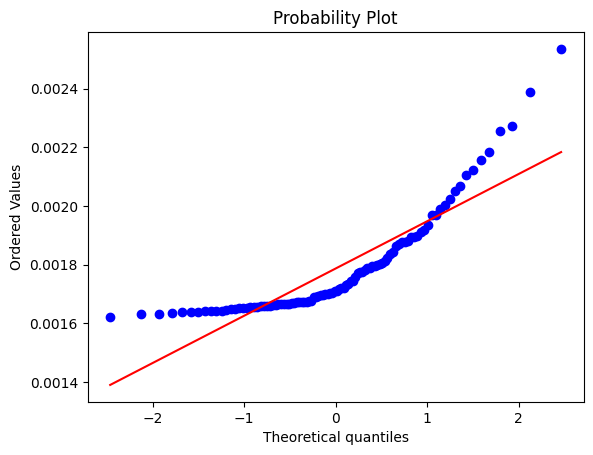

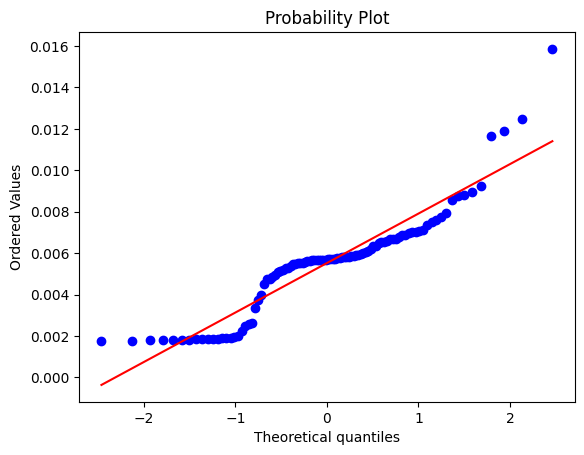

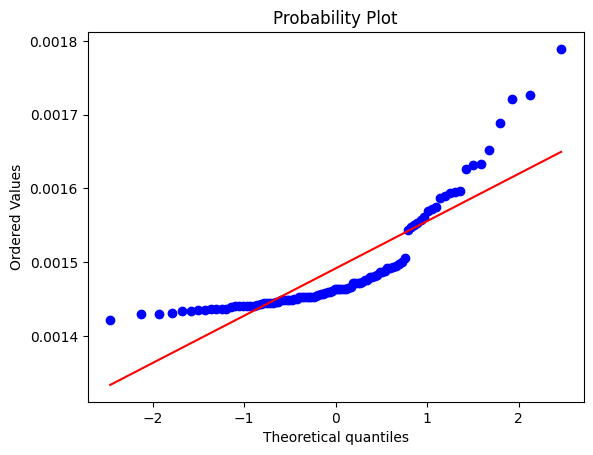

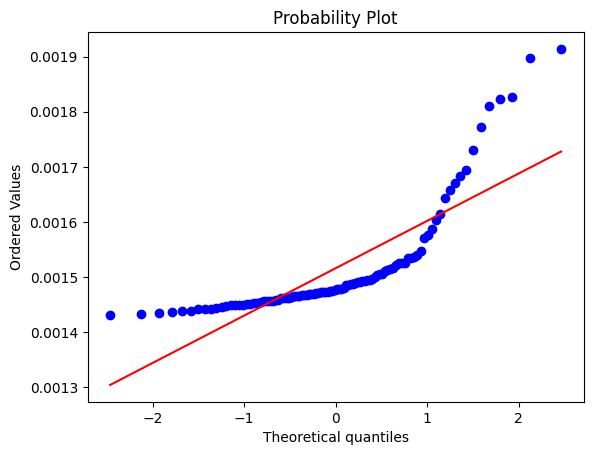

In [8]:
# Check the Q-Q plots --> Also to check if the data is normally distributed
stats.probplot(mf_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(md_pruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(mf_NOTpruned['time'], dist="norm", plot=plt)
plt.show()
stats.probplot(md_NOTpruned['time'], dist="norm", plot=plt)
plt.show()

In [9]:
# Significance test between minfill and mindegree per pruned or not pruned
ranksums(mf_NOTpruned['time'], md_NOTpruned['time'])            
ranksums(mf_pruned['time'], md_pruned['time']) 

print("mean minfill NOT pruned: ", mf_pruned['time'].mean())
print("mean mindegree NOT pruned: ", md_pruned['time'].mean())

mean minfill NOT pruned:  0.0017869299999999822
mean mindegree NOT pruned:  0.00551876


In [10]:
# Check if the variances are equal or not
np.var(mf_NOTpruned['time']), np.var(md_NOTpruned['time'])      
np.var(md_pruned['time']), np.var(mf_pruned['time'])            

print("The variances of the minfill heuristic and the mindegree heuristic are almost equal: ", np.var(mf_NOTpruned['time']), np.var(md_NOTpruned['time']))
print("The variances of the minfill heuristic and the mindegree heuristic are almost equal: ", np.var(md_pruned['time']), np.var(mf_pruned['time']))

# Significance test between minfill and mindegree per pruned or not pruned
ranksums(mf_NOTpruned['time'], md_NOTpruned['time'])            
ranksums(mf_pruned['time'], md_pruned['time'])                  

print("Are the results of the comparison mindegree vs. minfill heuristic for not pruned significant: ", ranksums(mf_NOTpruned['time'], md_NOTpruned['time'])[1] < 0.05)
print("Are the results of the comparison mindegree vs. minfill heuristic for pruned significant: ", ranksums(md_pruned['time'], mf_pruned['time'])[1] < 0.05)

# EXTRA: Check if the variances are equal or not
np.var(mf_pruned['time']), np.var(mf_NOTpruned['time'])         
np.var(md_pruned['time']), np.var(md_NOTpruned['time'])         

print("The variances of the minfill heuristic and the mindegree heuristic are almost equal: ", np.var(mf_pruned['time']), np.var(mf_NOTpruned['time']))
print("The variances of the minfill heuristic and the mindegree heuristic are almost equal: ", np.var(md_pruned['time']), np.var(md_NOTpruned['time']))

# EXTRA: Significance test between pruned and not pruned per heuristic
ranksums(mf_pruned['time'], mf_NOTpruned['time'])               
ranksums(md_pruned['time'], md_NOTpruned['time'])               

print("Are the results of the comparison mindegree vs. minfill heuristic significant: ", ranksums(mf_pruned['time'], mf_NOTpruned['time'])[1] < 0.05)
print("Are the results of the comparison mindegree vs. minfill heuristic significant: ", ranksums(md_pruned['time'], md_NOTpruned['time'])[1] < 0.05)

The variances of the minfill heuristic and the mindegree heuristic are almost equal:  5.312283600002203e-09 1.0387997099994015e-08
The variances of the minfill heuristic and the mindegree heuristic are almost equal:  6.21078220240053e-06 3.192408510002335e-08
Are the results of the comparison mindegree vs. minfill heuristic for not pruned significant:  True
Are the results of the comparison mindegree vs. minfill heuristic for pruned significant:  True
The variances of the minfill heuristic and the mindegree heuristic are almost equal:  3.192408510002335e-08 5.312283600002203e-09
The variances of the minfill heuristic and the mindegree heuristic are almost equal:  6.21078220240053e-06 1.0387997099994015e-08
Are the results of the comparison mindegree vs. minfill heuristic significant:  True
Are the results of the comparison mindegree vs. minfill heuristic significant:  True


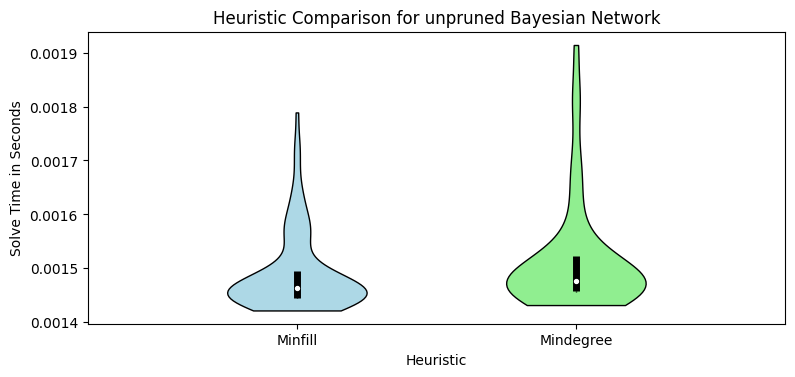

In [30]:
# Function to calculate the quartiles
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Heuristic')

# Create the test data
data1 = [mf_NOTpruned['time'].tolist(), md_NOTpruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Heuristic Comparison for unpruned Bayesian Network')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Minfill', 'Mindegree']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

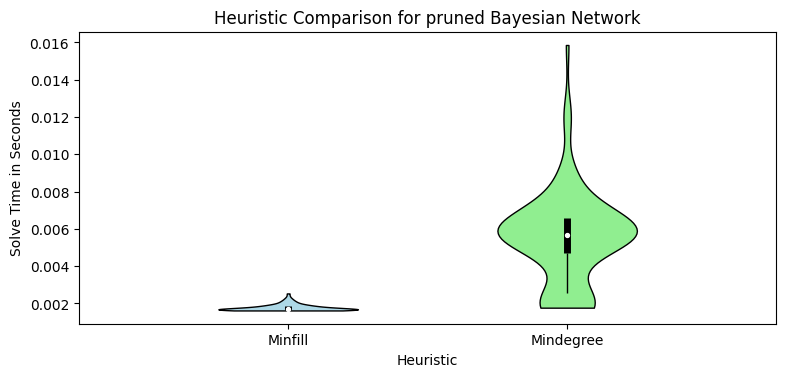

In [31]:
# Create the test data
data1 = [mf_pruned['time'].tolist(), md_pruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Heuristic Comparison for pruned Bayesian Network')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Minfill', 'Mindegree']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

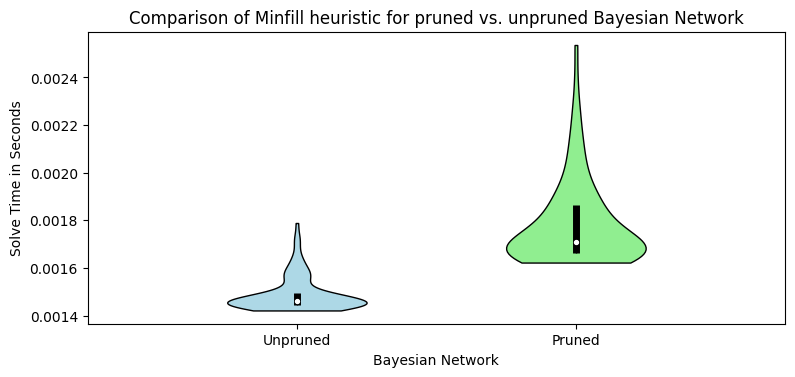

In [37]:
# Function to set the style of the boxplot
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Bayesian Network')

# Create the test data
data1 = [mf_NOTpruned['time'].tolist(), mf_pruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of Minfill heuristic for pruned vs. unpruned Bayesian Network')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Unpruned', 'Pruned']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

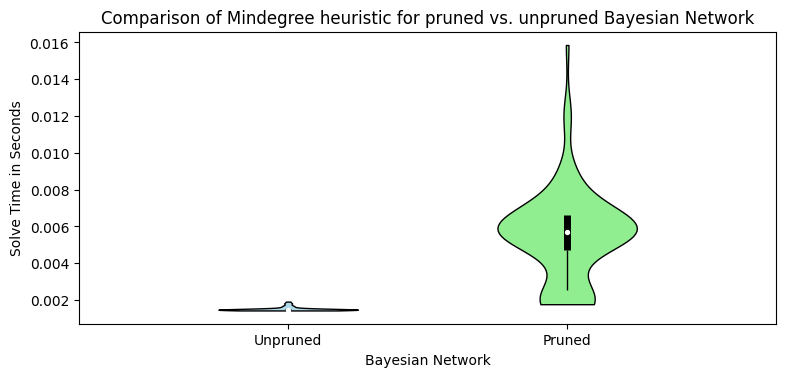

In [38]:
# Create the test data
data1 = [md_NOTpruned['time'].tolist(), md_pruned['time'].tolist()]       

# Create a figure instance
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

# Create the boxplot
ax1.set_title('Comparison of Mindegree heuristic for pruned vs. unpruned Bayesian Network')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightblue', 'lightgreen']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

# Create the boxplot    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# Add the scatter points
inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Unpruned', 'Pruned']
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

#### Comparison between all 4

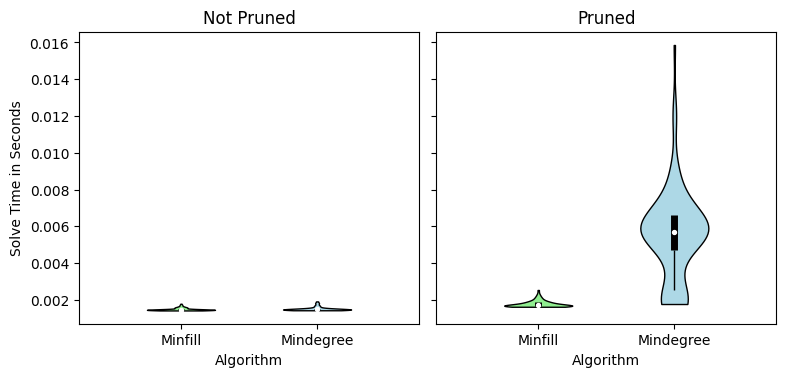

In [27]:
######## VIOLIN #########
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Algorithm')

# Create the test data
data1 = [mf_NOTpruned['time'].tolist(), md_NOTpruned['time'].tolist()]    
data2 = [mf_pruned['time'].tolist(), md_pruned['time'].tolist()]       

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Not Pruned')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# fill with colors
colors = ['lightgreen', 'lightblue']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax2.set_title('Pruned')
parts2 = ax2.violinplot(
        data2, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue']
for bplot in parts2:
    for patch, color in zip(parts2['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data2, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data2, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Minfill', 'Mindegree']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

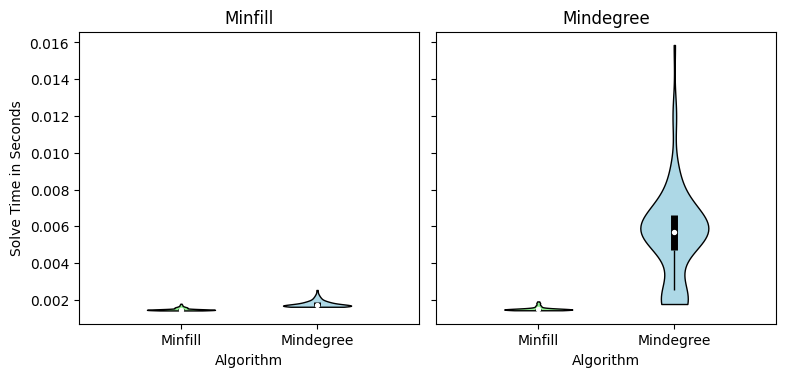

In [24]:
######## VIOLIN #########
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Algorithm')

# Create the test data
data1 = [mf_NOTpruned['time'].tolist(), mf_pruned['time'].tolist()]    
data2 = [md_NOTpruned['time'].tolist(), md_pruned['time'].tolist()]        

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Minfill')
ax1.set_ylabel('Solve Time in Seconds')
parts1 = ax1.violinplot(
        data1, showmeans=False, showmedians=False,
        showextrema=False)

# fill with colors
colors = ['lightgreen', 'lightblue']
for bplot in parts1:
    for patch, color in zip(parts1['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data1, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax2.set_title('Mindegree')
parts2 = ax2.violinplot(
        data2, showmeans=False, showmedians=False,
        showextrema=False)

# Fill with colors
colors = ['lightgreen', 'lightblue']
for bplot in parts2:
    for patch, color in zip(parts2['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data2, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data2, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# Set style for the axes
labels = ['Minfill', 'Mindegree']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()